In [1]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
%matplotlib notebook

from astropy.table import QTable

import seaborn as sns
pal = sns.color_palette("colorblind")

import pickle

from astropy.coordinates import SkyCoord
from pandas import DataFrame as df

In [2]:
# Load Full Data
full_ideal_res = QTable.read("Data/Full_Ideal_CloudyResults_wNHII.fits")
sources = np.unique(full_ideal_res["SOURCE"])
full_ideal_res = full_ideal_res[full_ideal_res["v"] >= 150*u.km/u.s]

with open("Data/HIGH_ION_DATA_wHII.pkl", "rb") as f:
    high_ion_data = pickle.load(f)

In [3]:
impact_pars = high_ion_data["b"] * u.kpc

In [4]:
cloud_sizes = (full_ideal_res["N_HI"] + full_ideal_res["N_HII"])/full_ideal_res["n_H"]
cloud_sizes = cloud_sizes.to(u.kpc)

<IPython.core.display.Javascript object>


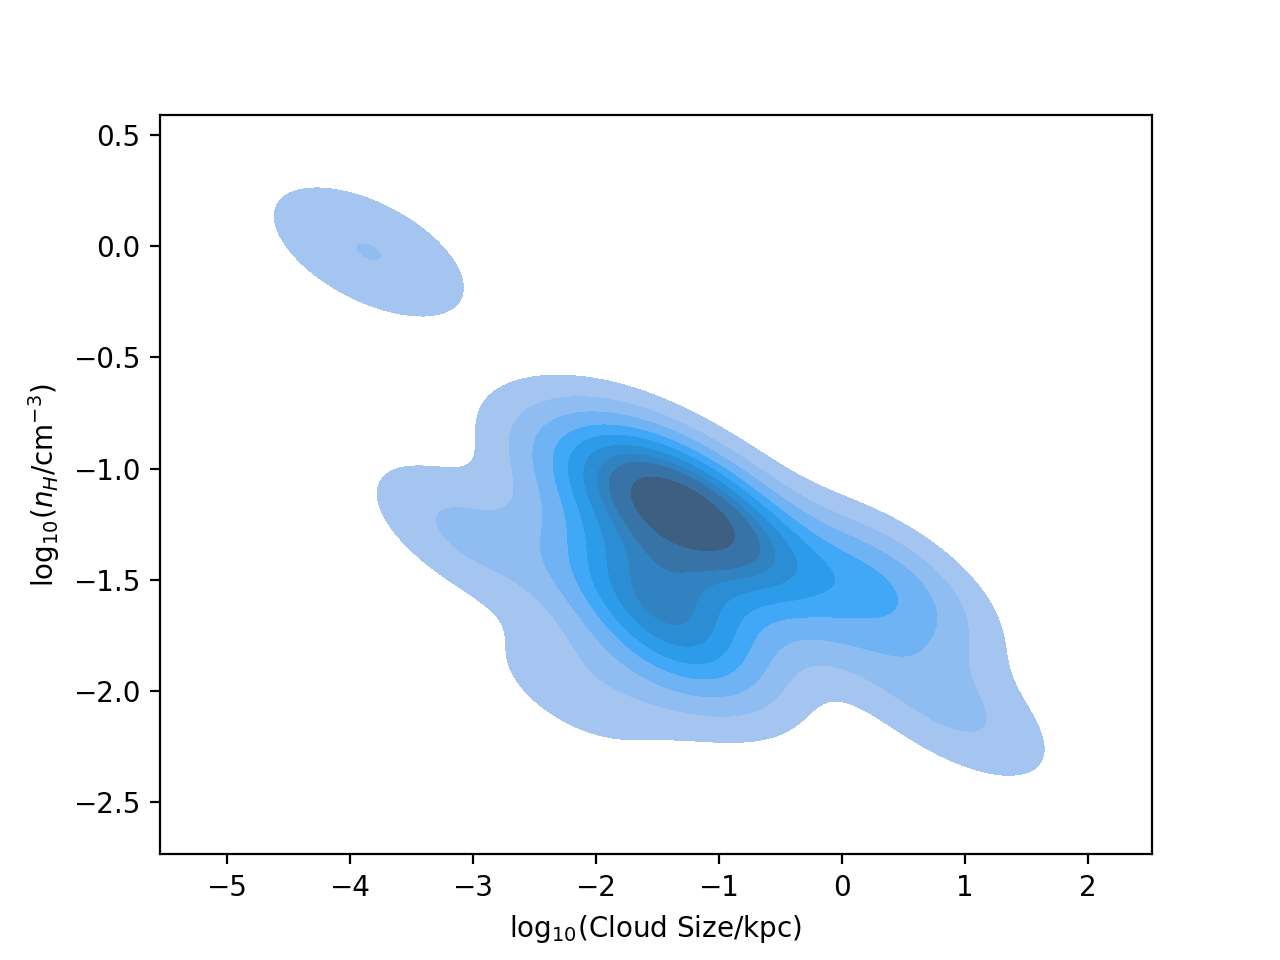

Text(0, 0.5, '$\\log_{10}(n_H/\\mathrm{cm}^{-3})$')

In [5]:
fig,ax = plt.subplots()

sns.kdeplot(x = np.log10(cloud_sizes.value), y = np.log10(full_ideal_res['n_H'].value), 
            shade = True, thresh = 0.05)

ax.set_xlabel(r"$\log_{10}(\mathrm{Cloud~Size/kpc})$")
ax.set_ylabel(r"$\log_{10}(n_H/\mathrm{cm}^{-3})$")

In [6]:
n=500
inds=np.random.choice(np.arange(len(cloud_sizes)),size=n,replace=True)

<IPython.core.display.Javascript object>


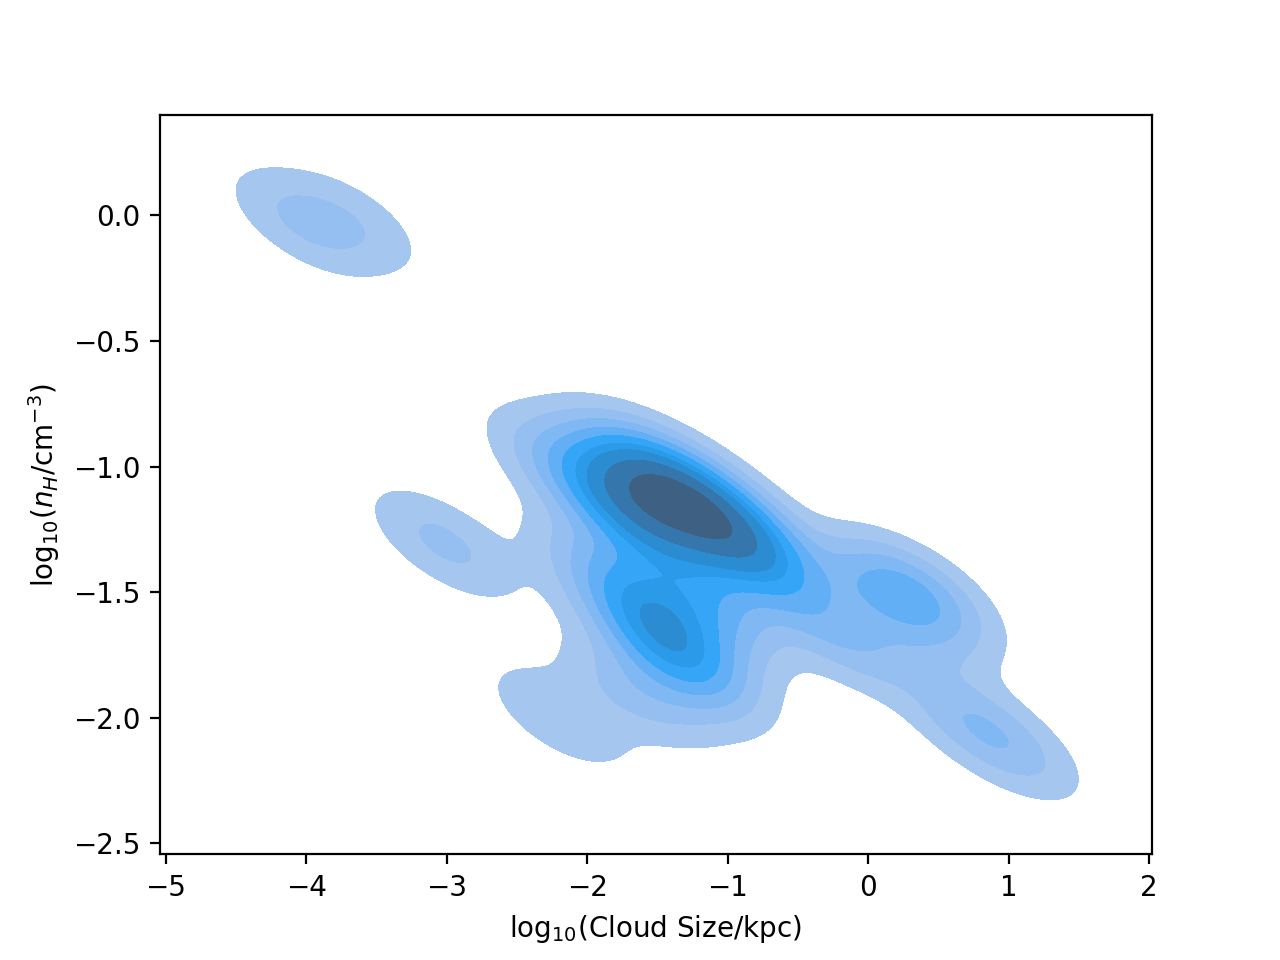

Text(0, 0.5, '$\\log_{10}(n_H/\\mathrm{cm}^{-3})$')

In [7]:
fig,ax = plt.subplots()

sns.kdeplot(x = np.log10(cloud_sizes.value)[inds], y = np.log10(full_ideal_res['n_H'].value)[inds], 
            shade = True, thresh = 0.05)

ax.set_xlabel(r"$\log_{10}(\mathrm{Cloud~Size/kpc})$")
ax.set_ylabel(r"$\log_{10}(n_H/\mathrm{cm}^{-3})$")

In [176]:
comps_per_sightline = np.array([np.sum(full_ideal_res["SOURCE"]==source) for source in sources])

In [180]:
S = np.median(comps_per_sightline)

In [184]:
R_CGM = 50*u.kpc

In [185]:
vff = f_cov * S * cloud_sizes/R_CGM

In [190]:
vff_est = np.percentile(vff, (16,50,84));vff_est*100

<Quantity [0.05303168, 0.13561799, 0.83541713]>

In [207]:
.14 - .05


0.09000000000000001

In [208]:
.84 - .14

0.7

In [193]:
N_cl = S * f_cov * R_CGM**2 / cloud_sizes**2
N_cl_est = np.percentile(N_cl, (16,50,84));N_cl_est

<Quantity [   55622.26402319,  2109839.93696822, 14125402.38127355]>

In [198]:
M_clouds = 4/3 * np.pi * cloud_sizes**3 * full_ideal_res["n_H"] * m_p
M_clouds = M_clouds.to(u.solMass)
M_clouds_est = np.percentile(M_clouds, (16,50,84));M_clouds_est

<Quantity [2.14419845e+01, 3.01626370e+02, 7.50737737e+04] solMass>

In [200]:
CGM_MASS = M_clouds * N_cl
logCGM_MASS_est = np.percentile(np.log10(CGM_MASS.value), (16,50,84));logCGM_MASS_est

array([8.40690512, 8.92821517, 9.61776869])

In [204]:
print(r"$\log_{{10}}(M_\mathrm{{low-ion}}/M_\odot) = {0:.1f}^{{+{1:.1f}}}_{{-{2:.1f}}}$".format(logCGM_MASS_est[1],
                                    logCGM_MASS_est[2]-logCGM_MASS_est[1], 
                                    logCGM_MASS_est[1] - logCGM_MASS_est[0]))

$\log_{10}(M_\mathrm{low-ion}/M_\odot) = 8.9^{+0.7}_{-0.5}$
